# 수도권 아파트 가격과 물가 상승률을 비교

- 물가 상승률에 비해 집 값이 더 많이 상승하는 내용을 보여주는 그래프

- APARTMENT_AVG_PRICE_CATEGORY_MONTHLY 테이블

- INFLATION_RATE_YEARLY 테이블 필요

### db 접근 후 필요한 테이블 가져오기

In [3]:
import matplotlib.pyplot as plt
import pymysql
import pandas as pd
import plotly.express as px
import koreanize_matplotlib

# 월별 수도권 아파트 평균 매매 가격 테이블
sql_query_category = """
SELECT * FROM APARTMENT_AVG_PRICE_CATEGORY_MONTHLY;
"""

# 연도별 물가 상승률 테이블
sql_query_inflation = """
SELECT * FROM INFLATION_RATE_YEARLY;
"""

### APARTMENT_AVG_PRICE_CATEGORY_MONTHLY 테이블

In [4]:
cur.execute(sql_query_category)
result_category = cur.fetchall()

category_price_df = pd.DataFrame(result_category)
category_price_df.columns = [desc[0] for desc in cur.description]

In [5]:
category_price_df.head(50)

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000
5,2014,6,수도권,338393000
6,2014,7,수도권,338403000
7,2014,8,수도권,338864000
8,2014,9,수도권,340449000
9,2014,10,수도권,341834000


### INFLATION_RATE_YEARLY

In [6]:
cur.execute(sql_query_inflation)
result_inflation = cur.fetchall()

inflation_df = pd.DataFrame(result_inflation)
inflation_df.columns = [desc[0] for desc in cur.description]

In [7]:
inflation_df

,YEAR,RATE
0,2013,1.3
1,2014,1.3
2,2015,0.7
3,2016,1.0
4,2017,1.9
5,2018,1.5
6,2019,0.4
7,2020,0.5
8,2021,2.5
9,2022,5.1


### 수도권 아파트 평균 매매가를 연도별로 가져오기

In [8]:
# 수도권 애들을 가져와서
filtered_df = category_price_df[category_price_df['CATEGORY'] == '수도권']

# 연도별로 그룹화하고 PRICE의 평균 계산
capital_avg_df = filtered_df.groupby('YEAR')['PRICE'].mean().reset_index()

# PRICE 컬럼을 int 형식으로 변환
capital_avg_df['PRICE'] = capital_avg_df['PRICE'].astype(int)

In [9]:
capital_avg_df

,YEAR,PRICE
0,2014,339409583
1,2015,357872416
2,2016,375368750
3,2017,388138333
4,2018,445578333
5,2019,491286250
6,2020,545120666
7,2021,665767666
8,2022,741899750
9,2023,657498750


### 연도별 평균 아파트 매매가 변화량 및 변화율 가져오기

- 변화율은 이전 년도끼리만 비교하는 상대적인 값임

In [10]:
# 연간 평균 가격 변화량 계산
capital_avg_df['CHANGE'] = capital_avg_df['PRICE'].diff()

# 변화량을 %로 변환
capital_avg_df['CHANGE_PERCENT'] = (capital_avg_df['CHANGE'] / capital_avg_df['PRICE'].shift(1)) * 100

capital_avg_df

,YEAR,PRICE,CHANGE,CHANGE_PERCENT
0,2014,339409583,NaN,NaN
1,2015,357872416,18462833.0,5.439691
2,2016,375368750,17496334.0,4.888986
3,2017,388138333,12769583.0,3.401877
4,2018,445578333,57440000.0,14.798848
5,2019,491286250,45707917.0,10.258110
6,2020,545120666,53834416.0,10.957851
7,2021,665767666,120647000.0,22.132164
8,2022,741899750,76132084.0,11.435233
9,2023,657498750,-84401000.0,-11.376335


In [11]:
# 2014년도부터 값만 있으므로 nan 값은 0 으로 통일
capital_avg_df.fillna(0, inplace=True)

capital_avg_df

,YEAR,PRICE,CHANGE,CHANGE_PERCENT
0,2014,339409583,0.0,0.000000
1,2015,357872416,18462833.0,5.439691
2,2016,375368750,17496334.0,4.888986
3,2017,388138333,12769583.0,3.401877
4,2018,445578333,57440000.0,14.798848
5,2019,491286250,45707917.0,10.258110
6,2020,545120666,53834416.0,10.957851
7,2021,665767666,120647000.0,22.132164
8,2022,741899750,76132084.0,11.435233
9,2023,657498750,-84401000.0,-11.376335


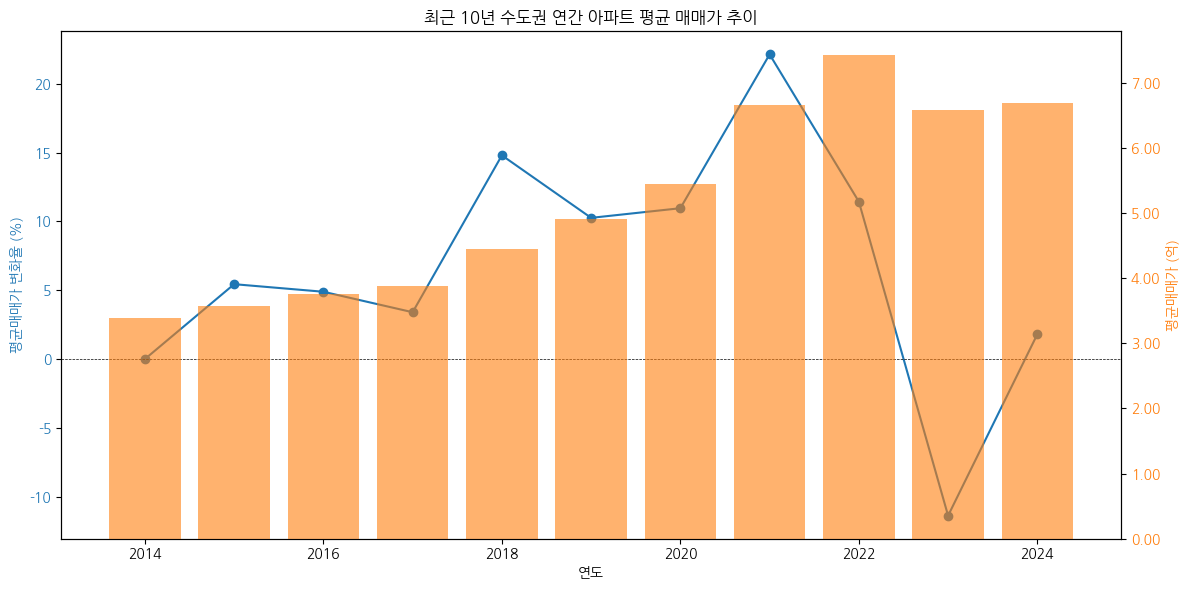

In [12]:
from matplotlib.ticker import FuncFormatter 

# PRICE 값을 100,000,000으로 나눈 값으로 포맷팅하는 함수
def format_price(x, _):
    return f"{x:.2f}"

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# CHANGE_PERCENT를 선 그래프로 추가
ax1.set_xlabel('연도')
ax1.set_ylabel('평균매매가 변화율 (%)', color='tab:blue')
ax1.plot(capital_avg_df['YEAR'], capital_avg_df['CHANGE_PERCENT'], color='tab:blue', marker='o', label='Change Percentage')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Y축 0에서 수평 그리드 추가
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')

# PRICE를 히스토그램으로 추가
ax2 = ax1.twinx()  # 동일한 x축을 공유하는 y축 추가
ax2.set_ylabel('평균매매가 (억)', color='tab:orange')
ax2.bar(capital_avg_df['YEAR'], capital_avg_df['PRICE'] / 100000000, color='tab:orange', alpha=0.6, label='Average Price')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# y축 포맷터 설정
ax2.yaxis.set_major_formatter(FuncFormatter(format_price))

# 그래프 타이틀 및 레전드 추가
plt.title('최근 10년 수도권 연간 아파트 평균 매매가 추이')
fig.tight_layout()  # 레이아웃 조정
plt.show()

### 연도별 수도권 평균 아파트 매매가 변화율 및 인플레이션 변화율 추이 그래프

- 이때, 각 변화율은 이전 년도와 비교하는 상대적인 값임.

- Y 축 0 을 기준으로 0 보다 크면 이전 년도에 비해 높아짐.

- Y 축 0 을 기준으로 0 보다 작으면 이전 년도에 비해 낮아짐.

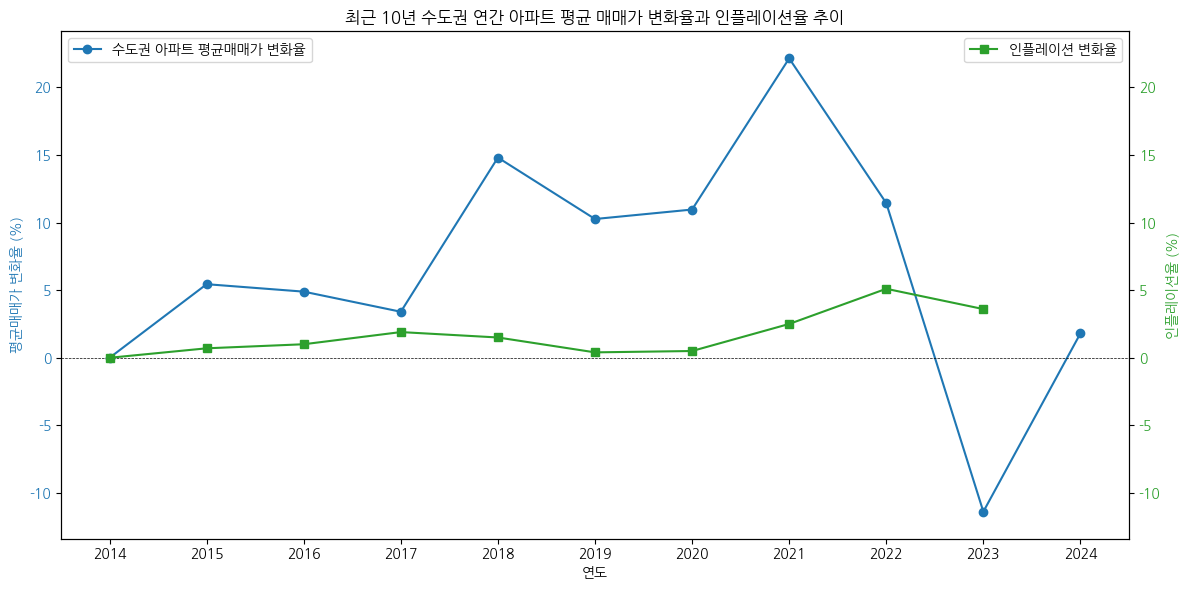

In [13]:
from matplotlib.ticker import FuncFormatter 
import matplotlib.pyplot as plt

# 2014년의 RATE 값을 0으로 변경
inflation_df.loc[inflation_df['YEAR'] == 2014, 'RATE'] = 0

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# CHANGE_PERCENT를 선 그래프로 추가
ax1.set_xlabel('연도')
ax1.set_ylabel('평균매매가 변화율 (%)', color='tab:blue')
ax1.plot(capital_avg_df['YEAR'], capital_avg_df['CHANGE_PERCENT'], color='tab:blue', marker='o', label='수도권 아파트 평균매매가 변화율')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# X축에 모든 연도 표시
ax1.set_xticks(capital_avg_df['YEAR'])  # x축에 표시할 모든 연도 설정

# Y축 0에서 수평 그리드 추가
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')

# PRICE를 위한 두 번째 y축 추가
ax2 = ax1.twinx()  # 동일한 x축을 공유하는 y축 추가
ax2.set_ylabel('인플레이션율 (%)', color='tab:green')
inflation_df_filtered = inflation_df[inflation_df['YEAR'] >= 2014]
ax2.plot(inflation_df_filtered['YEAR'], inflation_df_filtered['RATE'], color='tab:green', marker='s', label='인플레이션 변화율')
ax2.tick_params(axis='y', labelcolor='tab:green')

# y축 범위를 동일하게 맞추기
y_min = min(capital_avg_df['CHANGE_PERCENT'].min(), inflation_df_filtered['RATE'].min())
y_max = max(capital_avg_df['CHANGE_PERCENT'].max(), inflation_df_filtered['RATE'].max())
ax1.set_ylim(y_min - 2, y_max + 2)  # 약간의 여유를 두고 설정
ax2.set_ylim(y_min - 2, y_max + 2)

# 그래프 타이틀 및 레전드 추가
plt.title('최근 10년 수도권 연간 아파트 평균 매매가 변화율과 인플레이션율 추이')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 레이아웃 조정
fig.tight_layout()  
plt.show()
